#ICP4

In [1]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import word_tokenize

nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [2]:
#get the Data used :
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [3]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


##1)	Data cleaning and preprocessing



###Removing unnecessary columns or data

*   [항목 추가](https://)
*   항목 추가



In [4]:
#remove id column
Data = Data.drop("id", axis=1)

In [5]:
Data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


###Removing Twitter Handles( @user )

In [6]:
#library for data cleaning
import re
import numpy as np



def remove_handle(text, pattern):
  # finds the pattern @ and put it in a list
  words = re.findall(pattern, text)

  for word in words:
    #remove @ and replace it with blank
    text = re.sub(word,"",text)

  return text


#make a new column named cleaned tweet
Data["Cleaned_Tweets"] = np.vectorize(remove_handle)(Data['tweet'], "@[\w]*")

#Remove tweet column
Data = Data.drop("tweet", axis=1)

In [7]:
Data

,label,Cleaned_Tweets
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"#sikh #temple vandalised in in #calgary, #wso..."


###Removing punctuation, numbers, special characters

In [8]:
#replace everything except characters. Series.str can be used to access the values of the series
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].str.replace("[^a-zA-Z]", " ")

In [9]:
Data

,label,Cleaned_Tweets
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ...
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu ...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso...


#Visualization of postag(Using yellowbrick)

In [10]:
# list for contain postagged words
tagged_words = []

#Pos tagging each word
for words in Data["Cleaned_Tweets"]:
  tagged_words.append(nltk.pos_tag(words)) 

#Change the form to use in yellowbrick
tagged_words = [tagged_words]

In [11]:
pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.1)


In [12]:
#library to visualizae postag
from yellowbrick.text import PosTagVisualizer


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


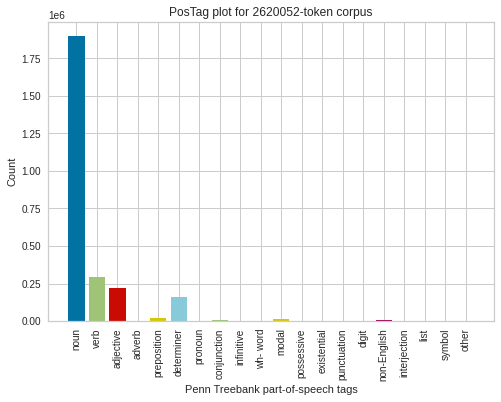

In [13]:
# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer()
viz.fit(tagged_words)
viz.show()




###Removing stop words

In [14]:
#import stopword from nltk
from nltk.corpus import stopwords


In [15]:

stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
#Series.apply Invoke function on values of Series and remove words in stopword
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))

In [17]:
Data


,label,Cleaned_Tweets
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


###Tokenization, and Stemming

In [18]:
#Tokenize the text by word
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: word_tokenize(x))

In [19]:
Data

,label,Cleaned_Tweets
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"
...,...,...
31957,0,"[ate, isz, youuu]"
31958,0,"[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,"[listening, sad, songs, monday, morning, otw, ..."
31960,1,"[sikh, temple, vandalised, calgary, wso, conde..."


In [20]:

#Import stemming library
from nltk.stem import PorterStemmer
porter = PorterStemmer()
#Stemming for each Series values
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: [porter.stem(word) for word in x])



In [21]:
Data

,label,Cleaned_Tweets
0,0,"[father, dysfunct, selfish, drag, kid, dysfunc..."
1,0,"[thank, lyft, credit, use, caus, offer, wheelc..."
2,0,"[bihday, majesti]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguid, societi, motiv]"
...,...,...
31957,0,"[ate, isz, youuu]"
31958,0,"[see, nina, turner, airwav, tri, wrap, mantl, ..."
31959,0,"[listen, sad, song, monday, morn, otw, work, sad]"
31960,1,"[sikh, templ, vandalis, calgari, wso, condemn,..."


In [22]:
Data["Cleaned_Tweets"] = Data["Cleaned_Tweets"].apply(lambda x: " ".join(x))

In [23]:
Data

,label,Cleaned_Tweets
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit use caus offer wheelchair va...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguid societi motiv
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwav tri wrap mantl genuin h...
31959,0,listen sad song monday morn otw work sad
31960,1,sikh templ vandalis calgari wso condemn act


**Tokenization using keras**

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers



In [25]:
from sklearn.model_selection import train_test_split


In [26]:
# Maximum number of words to work with 5000
tokenizer = Tokenizer(num_words=5000)

In [27]:
# Updates internal vocabulary based on a list of texts. 
tokenizer.fit_on_texts(Data["Cleaned_Tweets"].values)


In [29]:
# Return list of sequences (one per text input).
X = tokenizer.texts_to_sequences(Data["Cleaned_Tweets"].values)
X

In [30]:
maxlen = 100
# ensure that all sequences in a list have the same length.
X = pad_sequences(X, padding="post", maxlen=maxlen)

In [31]:
X

array([[  16, 2122, 1806, ...,    0,    0,    0],
       [   5, 4548, 1946, ...,    0,    0,    0],
       [  20, 2846,    0, ...,    0,    0,    0],
       ...,
       [ 230,   64,  269, ...,    0,    0,    0],
       [1392, 1096, 1434, ...,    0,    0,    0],
       [   5,   47,    0, ...,    0,    0,    0]], dtype=int32)

In [32]:
X.shape

(31962, 100)

In [33]:
# Target value for the training
y= Data["label"].values

In [34]:
# calculate vocab size based on word index of tokenized words
vocab_size = len(tokenizer.word_index) + 1

### train/test split of data




In [35]:
#70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3,random_state=15)

In [36]:
print(x_test.shape, y_test.shape)

(9589, 100) (9589,)


In [37]:
print(x_train.shape, y_train.shape)

(22373, 100) (22373,)


**Simple deeplearning model**

In [38]:

embedding_dim = 50

model = Sequential()
# embeding layer
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
# flattening
model.add(layers.Flatten())

# Add a Dense layer with 10 units.
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.2))

# Add a Dense layer with 5 units.
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.2))


model.add(layers.Dense(1, activation='sigmoid'))

# compile the model with chosen parameters
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1566300   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [39]:

model.fit(x_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=30)


Epoch 1/10
746/746 [==============================] - 14s 18ms/step - loss: 0.2202 - accuracy: 0.9306 - val_loss: 0.1467 - val_accuracy: 0.9280
Epoch 2/10
746/746 [==============================] - 13s 18ms/step - loss: 0.1219 - accuracy: 0.9361 - val_loss: 0.1472 - val_accuracy: 0.9547
Epoch 3/10
746/746 [==============================] - 13s 18ms/step - loss: 0.0919 - accuracy: 0.9729 - val_loss: 0.1725 - val_accuracy: 0.9567
Epoch 4/10
746/746 [==============================] - 13s 18ms/step - loss: 0.0720 - accuracy: 0.9810 - val_loss: 0.2061 - val_accuracy: 0.9543
Epoch 5/10
746/746 [==============================] - 14s 18ms/step - loss: 0.0528 - accuracy: 0.9864 - val_loss: 0.2318 - val_accuracy: 0.9531
Epoch 6/10
746/746 [==============================] - 13s 18ms/step - loss: 0.0424 - accuracy: 0.9898 - val_loss: 0.3121 - val_accuracy: 0.9563
Epoch 7/10
746/746 [==============================] - 14s 18ms/step - loss: 0.0339 - accuracy: 0.9918 - val_loss: 0.3821 - val_accuracy:

In [40]:
# Model evaluation
scores = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))


300/300 - 0s - loss: 0.5697 - accuracy: 0.9554
Accuracy: 95.54%


**Recurrent Neural Networks (RNN) with Keras**


In [35]:
model2 = Sequential()

In [36]:
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=128,
                           input_length=X.shape[1]))

In [37]:
# performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements
model2.add(layers.SpatialDropout1D(0.5))

In [38]:
#Add a LSTM layer with 185 internal units.

model2.add(layers.LSTM(185, dropout=0.4, recurrent_dropout=0.4))


In [39]:
# Add a Dense layer with 2 units. using softmax activation and using categorical_crossentropy

model2.add(layers.Dense(2,activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [40]:
# To adjust the shape to the 
Y = pd.get_dummies(Data['label']).values

# train test split for the changed value
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.7, test_size=0.3,random_state=15)

In [41]:
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          4009728   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 185)               232360    
_________________________________________________________________
dense (Dense)                (None, 2)                 372       
Total params: 4,242,460
Trainable params: 4,242,460
Non-trainable params: 0
_________________________________________________________________


In [42]:
print(X_train.shape, Y_train.shape)

(21414, 100) (21414, 2)


In [43]:
model2.fit(X_train, Y_train, epochs = 3, batch_size=30, verbose=True)


Epoch 1/3
714/714 [==============================] - 360s 505ms/step - loss: 0.2600 - accuracy: 0.9290
Epoch 2/3
714/714 [==============================] - 364s 510ms/step - loss: 0.2555 - accuracy: 0.9300
Epoch 3/3
714/714 [==============================] - 361s 505ms/step - loss: 0.2553 - accuracy: 0.9300


In [45]:
# Model evaluation
scores = model2.evaluate(X_test, Y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))


330/330 - 20s - loss: 0.2549 - accuracy: 0.9297
Accuracy: 92.97%
